### 1 min moving average for 1st hour Tidal Volume

##### Calculate the Tidal Volume: 

In [1]:
# CDGR (all)
## Concatenate all the CDGR files.

import os
import pandas as pd

# Directory path
directory_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/Cleaned/CDGR/"

# List to store DataFrames
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Read CSV file into a DataFrame
        filepath = os.path.join(directory_path, filename)
        df = pd.read_csv(filepath)
        
        # Extract hour from Time column
        df['Time'] = pd.to_datetime(df['Time'])
        df['Hour'] = df['Time'].dt.hour
        # print(len(df['Hour'].unique()))
        
        # Create Time_Stamp column based on hour
        df['Time_Stamp'] = df['Hour'].apply(lambda hour: f'{hour % 12}{"am" if hour < 12 else "pm"}')
        # print(len(df['Time_Stamp'].unique()))
        
        # Create Time_Stamp_2 column
        df['Time_Stamp_2'] = df['Hour'].apply(lambda hour: f'H{hour + 1}')
        
        # Add a column indicating the source file
        df['Source_File'] = filename
        
        # Append DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames
result_df = pd.concat(dfs, ignore_index=True)

# Display the number of unique source files
print(len(result_df['Source_File'].unique()))  # Number of unique source files
print(len(result_df['Hour'].unique()))
print(len(result_df['Time_Stamp'].unique()))
print(len(result_df['Time_Stamp_2'].unique()))
print(result_df.info())  # Info about the concatenated DataFrame

48
24
24
24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13894932 entries, 0 to 13894931
Data columns (total 24 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Relative Time (sec)            float64       
 1   Time                           datetime64[ns]
 2   CDGR - FiO₂                    float64       
 3   CDGR - PEEP                    float64       
 4   CDGR - Set: VT in mL           float64       
 5   CDGR - Paw                     float64       
 6   CDGR - Set: PEEP L             float64       
 7   CDGR - eVT                     float64       
 8   CDGR - PIP                     float64       
 9   CDGR - Pplat                   float64       
 10  CDGR - Set: Pinsp              float64       
 11  CDGR - Flow                    float64       
 12  CDGR - iPress Wave             float64       
 13  GE - SpO2 1                    float64       
 14  OSI                            float64       
 15  C

In [2]:
## Concatenate all the Mode Category CDGR files.

import os
import pandas as pd

# List to store DataFrames
dfs = []

# Specify the filenames to concatenate
filenames_to_concat = ["/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/Mode_Cat_CDGR_58.csv", 
                       "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/Mode_Cat_CDGR_151.csv"]

# Iterate over specified filenames
for filename in filenames_to_concat:
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Add a column indicating the source file
    df['Source_File'] = filename
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
Mode_Cat_CDGR = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(len(Mode_Cat_CDGR['File Name'].unique()))
print(Mode_Cat_CDGR.info())

# # Save the dataframe as a CSV file
# csv_file_path = 'Mode_Cat_CDGR.csv'
# Mode_Cat_CDGR.to_csv(csv_file_path, index=False)

49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PID            49 non-null     int64 
 1   File Name      49 non-null     object
 2   File Name 2    49 non-null     object
 3   Mode Category  49 non-null     object
 4   Source_File    49 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB
None


In [3]:
## Concatenate all the patient weight CDGR files.

import os
import pandas as pd

# List to store DataFrames
dfs = []

# Specify the filenames to concatenate
filenames_to_concat = ["/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/58_CDGR_39_24hrs_Weights.csv", 
                       "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/151_CDGR_11_24hrs_Weights.csv"]

# Iterate over specified filenames
for filename in filenames_to_concat:
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Add a column indicating the source file
    df['Source_File'] = filename
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
Weights_CDGR = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(len(Weights_CDGR['patient_id'].unique()))
print(Weights_CDGR.info())

# # Save the dataframe as a CSV file
# csv_file_path = 'Weights_CDGR.csv'
# Weights_CDGR.to_csv(csv_file_path, index=False)

50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     50 non-null     int64  
 1   average_value  50 non-null     float64
 2   Source_File    50 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB
None


In [4]:
# CDGR (all)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Print the count of NaN values in 'CDGR - eVT'
print(result_df['CDGR - eVT'].isna().sum())

# # Drop rows where 'CDGR - eVT' is NaN
# result_df.dropna(subset=['CDGR - eVT'], inplace=True)

# # Print the count of NaN values in 'CDGR - eVT'
# print(result_df['CDGR - eVT'].isna().sum())

# Iterate through each unique filename
for filename in result_df['Source_File'].unique():
    # Step 1: Read the CSV file into a DataFrame
    df1 = Mode_Cat_CDGR
    # Check if "filename" matches "File Name 2" and add PID to title
    matched_row1 = df1[df1["File Name"] == str(filename)]
    if not matched_row1.empty:
        pid = matched_row1["PID"].iloc[0]  # Extract PID from filename
        # print("PID:", pid)
        
        # Step 2: Read the weights CSV file into a DataFrame
        df2 = Weights_CDGR
        # Check if "filename" matches "patient_id" and add weight
        matched_row2 = df2[df2["patient_id"] == pid]
        if not matched_row2.empty:
            weight = matched_row2["average_value"].iloc[0]  # Extract weight from dataframe
            # print("Weight:", weight)
            
            # Calculate 'TV(mL/kg)' only if weight is not None
            if weight is not None:
                # Filter rows by filename
                subset_df = result_df[result_df['Source_File'] == filename].copy()  # Make a copy to avoid SettingWithCopyWarning

                # Calculate 'TV(mL/kg)' and assign to a new column using .loc
                subset_df.loc[:, 'TV(mL/kg)'] = subset_df['CDGR - eVT'] / weight

                # # Filter rows where 'TV(mL/kg)' is less than 25
                # subset_df = subset_df[subset_df['TV(mL/kg)'] < 25]
                # # print(len(subset_df['TV(mL/kg)']))
                # # print(subset_df['TV(mL/kg)'].isna().sum())
                
                # Update result_df with the calculated values using .loc
                result_df.loc[subset_df.index, 'TV(mL/kg)'] = subset_df['TV(mL/kg)']
                
                # Apply a 1-minute moving average to tidal volume
                df = subset_df.copy()  # Make a copy to avoid SettingWithCopyWarning
                df.set_index('Time', inplace=True)  # Set 'Time' as the index
                df.sort_index(inplace=True)  # Ensure the index is sorted to be monotonic
                df['TV(mL/kg)_ma'] = df['TV(mL/kg)'].rolling('1T').mean()  # Calculate the rolling mean with a 1-minute window
                df.reset_index(drop=True, inplace=True)  # Reset the index to original structure
                # print(len(df['TV(mL/kg)_ma']))
                # print(df['TV(mL/kg)_ma'].isna().sum())
                
                # Update result_df with the calculated values using .loc
                result_df.loc[subset_df.index, 'TV(mL/kg)_ma'] = df['TV(mL/kg)_ma'].values

                # Add PID and weight to the DataFrame using .loc
                result_df.loc[subset_df.index, 'PID'] = pid
                result_df.loc[subset_df.index, 'Weight'] = weight
            else:
                print("Weight is None, cannot calculate 'TV(mL/kg)'.")
        else:
            print("No weight information found for PID:", pid)
    else:
        print("No match found for filename:", filename)

0


In [5]:
print(result_df.info())
print(result_df['Source_File'].unique())
print(len(result_df['Source_File'].unique()))
print(result_df['PID'].unique())
print(len(result_df['PID'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13894932 entries, 0 to 13894931
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Relative Time (sec)            float64       
 1   Time                           datetime64[ns]
 2   CDGR - FiO₂                    float64       
 3   CDGR - PEEP                    float64       
 4   CDGR - Set: VT in mL           float64       
 5   CDGR - Paw                     float64       
 6   CDGR - Set: PEEP L             float64       
 7   CDGR - eVT                     float64       
 8   CDGR - PIP                     float64       
 9   CDGR - Pplat                   float64       
 10  CDGR - Set: Pinsp              float64       
 11  CDGR - Flow                    float64       
 12  CDGR - iPress Wave             float64       
 13  GE - SpO2 1                    float64       
 14  OSI                            float64       
 15  CDGR - iPress

In [6]:
# Print the count of NaN values in 'TV(mL/kg)' and 'TV(mL/kg)_ma'
print(result_df['TV(mL/kg)'].isna().sum())
print(result_df['TV(mL/kg)_ma'].isna().sum())

0
0


In [7]:
CDGR_1st_df = result_df
CDGR_1st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13894932 entries, 0 to 13894931
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Relative Time (sec)            float64       
 1   Time                           datetime64[ns]
 2   CDGR - FiO₂                    float64       
 3   CDGR - PEEP                    float64       
 4   CDGR - Set: VT in mL           float64       
 5   CDGR - Paw                     float64       
 6   CDGR - Set: PEEP L             float64       
 7   CDGR - eVT                     float64       
 8   CDGR - PIP                     float64       
 9   CDGR - Pplat                   float64       
 10  CDGR - Set: Pinsp              float64       
 11  CDGR - Flow                    float64       
 12  CDGR - iPress Wave             float64       
 13  GE - SpO2 1                    float64       
 14  OSI                            float64       
 15  CDGR - iPress

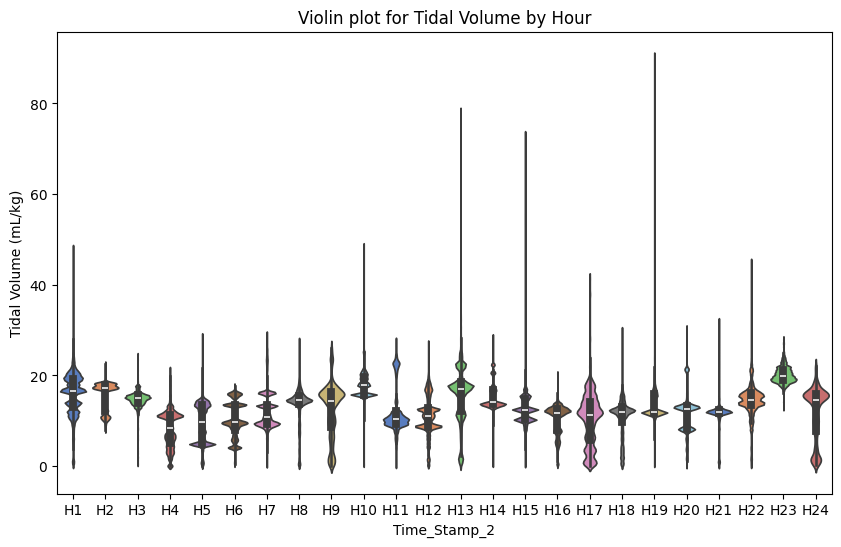

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up the plotting environment
fig, ax = plt.subplots(figsize=(10, 6))

# Create the violin plot with the boxplot included and a specified order
sns.violinplot(ax=ax, 
               x='Time_Stamp_2', 
               y='TV(mL/kg)', 
               data=CDGR_1st_df, 
               inner='box',    # Include the boxplot inside the violin plot
               hue='Time_Stamp_2', 
               palette='muted',
               legend=False)

# Customize the plot as needed
ax.set_title('Violin plot for Tidal Volume by Hour')
ax.set_xlabel('Time_Stamp_2')
ax.set_ylabel('Tidal Volume (mL/kg)')

custom_labels = CDGR_1st_df['Time_Stamp_2'].unique()
custom_labels = sorted(custom_labels, key=lambda x: int(x[1:]))

# Set custom x-axis labels (bottom x-axis)
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)

# Show the plot
plt.show()


In [9]:
# AVEAA (all)
## Concatenate all the AVEAA files.

import os
import pandas as pd

# Directory path
directory_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/Cleaned/AVEAA/"

# List to store DataFrames
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Read CSV file into a DataFrame
        filepath = os.path.join(directory_path, filename)
        df = pd.read_csv(filepath)
        
        # Separate df['Time'] into 24 hours
        df['Hour'] = pd.to_datetime(df['Time']).dt.hour
        # print(len(df['Hour'].unique()))
        
        # Create Time_Stamp column based on hour
        df['Time_Stamp'] = df['Hour'].apply(lambda hour: f'{hour % 12}{"am" if hour < 12 else "pm"}')
        # print(len(df['Time_Stamp'].unique()))
        
        # Create Time_Stamp_2 column
        df['Time_Stamp_2'] = df['Hour'].apply(lambda hour: f'H{hour + 1}')
        
        # Add a column indicating the source file
        df['Source_File'] = filename
        
        # Append DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames
result_df = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(len(result_df['Source_File'].unique()))  # Number of unique source files
print(len(result_df['Hour'].unique()))
print(len(result_df['Time_Stamp'].unique()))
print(len(result_df['Time_Stamp_2'].unique()))
print(result_df.info())  # Info about the concatenated DataFrame

8
11
11
11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361679 entries, 0 to 2361678
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Relative Time (sec)              float64
 1   Time                             object 
 2   Oxygenation Saturation Index     float64
 3   AVEA - PEEP                      float64
 4   AVEA - Set: iVT                  float64
 5   AVEA - eVT                       float64
 6   AVEA - FiO₂                      float64
 7   AVEA - PIP                       float64
 8   AVEA - Set: PEEP                 float64
 9   AVEA - Paw                       float64
 10  AVEA - Set: Pinsp                float64
 11  AVEA - Air Flow Wave             float64
 12  GE - SpO2 1                      float64
 13  OSI                              float64
 14  AVEA - PIP (FTandBBF)            float64
 15  AVEA - PEEP (FTandBBF)           float64
 16  AVEA - Air Flow Wave (FTandBBF)  float64
 1

In [10]:
## Concatenate all the Mode Category AVEAA files.

import os
import pandas as pd

# List to store DataFrames
dfs = []

# Specify the filenames to concatenate
filenames_to_concat = ["/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/Mode_Cat_AVEAA_58.csv", 
                       "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/Mode_Cat_AVEAA_151.csv"]

# Iterate over specified filenames
for filename in filenames_to_concat:
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Add a column indicating the source file
    df['Source_File'] = filename
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
Mode_Cat_AVEAA = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(len(Mode_Cat_AVEAA['File Name'].unique()))

# # Save the dataframe as a CSV file
# csv_file_path = 'Mode_Cat_AVEAA.csv'
# Mode_Cat_AVEAA.to_csv(csv_file_path, index=False)

8


In [11]:
## Concatenate all the patient weight AVEAA files.

import os
import pandas as pd

# List to store DataFrames
dfs = []

# Specify the filenames to concatenate
filenames_to_concat = ["/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/58_AVEAA_4_24hrs_Weights.csv", 
                       "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/PvsV_24hrs_Raw/151_AVEAA_4_24hrs_Weights.csv"]

# Iterate over specified filenames
for filename in filenames_to_concat:
    # Read CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Add a column indicating the source file
    df['Source_File'] = filename
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames
Weights_AVEAA = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(len(Weights_AVEAA['patient_id'].unique()))

# # Save the dataframe as a CSV file
# csv_file_path = 'Weights_AVEAA.csv'
# Weights_AVEAA.to_csv(csv_file_path, index=False)

8


In [12]:
# AVEAA (all)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Print the count of NaN values in 'AVEA - eVT'
print(result_df['AVEA - eVT'].isna().sum())

# # Drop rows where 'AVEA - eVT' is NaN
# result_df.dropna(subset=['AVEA - eVT'], inplace=True)

# # Print the count of NaN values in 'AVEA - eVT'
# print(result_df['AVEA - eVT'].isna().sum())

# Iterate through each unique filename
for filename in result_df['Source_File'].unique():
    # Step 1: Read the CSV file into a DataFrame
    df1 = Mode_Cat_AVEAA
    # Check if "filename" matches "File Name 2" and add PID to title
    matched_row1 = df1[df1["File Name"] == str(filename)]
    if not matched_row1.empty:
        pid = matched_row1["PID"].iloc[0]  # Extract PID from filename
        # print("PID:", pid)
        
        # Step 2: Read the weights CSV file into a DataFrame
        df2 = Weights_AVEAA
        # Check if "filename" matches "patient_id" and add weight
        matched_row2 = df2[df2["patient_id"] == pid]
        if not matched_row2.empty:
            weight = matched_row2["average_value"].iloc[0]  # Extract weight from dataframe
            # print("Weight:", weight)
            
            # Calculate 'TV(mL/kg)' only if weight is not None
            if weight is not None:
                # Filter rows by filename
                subset_df = result_df[result_df['Source_File'] == filename].copy()  # Make a copy to avoid SettingWithCopyWarning

                # Calculate 'TV(mL/kg)' and assign to a new column using .loc
                subset_df.loc[:, 'TV(mL/kg)'] = subset_df['AVEA - eVT'] / weight

                # # Filter rows where 'TV(mL/kg)' is less than 25
                # subset_df = subset_df[subset_df['TV(mL/kg)'] < 25]
                # # print(len(subset_df['TV(mL/kg)']))
                # # print(subset_df['TV(mL/kg)'].isna().sum())
                
                # Update result_df with the calculated values using .loc
                result_df.loc[subset_df.index, 'TV(mL/kg)'] = subset_df['TV(mL/kg)']
                
                # Apply a 2-minute moving average to tidal volume
                df = subset_df.copy()  # Make a copy to avoid SettingWithCopyWarning
                df['Time'] = pd.to_datetime(df['Time'])  # Ensure 'Time' column is datetime type
                df.set_index('Time', inplace=True)  # Set 'Time' as the index
                df.sort_index(inplace=True)  # Ensure the index is sorted to be monotonic
                df['TV(mL/kg)_ma'] = df['TV(mL/kg)'].rolling('1T').mean()  # Calculate the rolling mean with a 2-minute window
                df.reset_index(drop=True, inplace=True)  # Reset the index to original structure
                # print(len(df['TV(mL/kg)_ma']))
                # print(df['TV(mL/kg)_ma'].isna().sum())
                
                # Update result_df with the calculated values using .loc
                result_df.loc[subset_df.index, 'TV(mL/kg)_ma'] = df['TV(mL/kg)_ma'].values

                # Add PID and weight to the DataFrame using .loc
                result_df.loc[subset_df.index, 'PID'] = pid
                result_df.loc[subset_df.index, 'Weight'] = weight
            else:
                print("Weight is None, cannot calculate 'TV(mL/kg)'.")
        else:
            print("No weight information found for PID:", pid)
    else:
        print("No match found for filename:", filename)

0


In [13]:
print(result_df.info())
print(result_df['Source_File'].unique())
print(len(result_df['Source_File'].unique()))
print(result_df['PID'].unique())
print(len(result_df['PID'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361679 entries, 0 to 2361678
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Relative Time (sec)              float64
 1   Time                             object 
 2   Oxygenation Saturation Index     float64
 3   AVEA - PEEP                      float64
 4   AVEA - Set: iVT                  float64
 5   AVEA - eVT                       float64
 6   AVEA - FiO₂                      float64
 7   AVEA - PIP                       float64
 8   AVEA - Set: PEEP                 float64
 9   AVEA - Paw                       float64
 10  AVEA - Set: Pinsp                float64
 11  AVEA - Air Flow Wave             float64
 12  GE - SpO2 1                      float64
 13  OSI                              float64
 14  AVEA - PIP (FTandBBF)            float64
 15  AVEA - PEEP (FTandBBF)           float64
 16  AVEA - Air Flow Wave (FTandBBF)  float64
 17  AVEA - e

In [14]:
# Print the count of NaN values in 'TV(mL/kg)' and 'TV(mL/kg)_ma'
print(result_df['TV(mL/kg)'].isna().sum())
print(result_df['TV(mL/kg)_ma'].isna().sum())

0
0


In [15]:
AVEAA_1st_df = result_df
AVEAA_1st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361679 entries, 0 to 2361678
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Relative Time (sec)              float64
 1   Time                             object 
 2   Oxygenation Saturation Index     float64
 3   AVEA - PEEP                      float64
 4   AVEA - Set: iVT                  float64
 5   AVEA - eVT                       float64
 6   AVEA - FiO₂                      float64
 7   AVEA - PIP                       float64
 8   AVEA - Set: PEEP                 float64
 9   AVEA - Paw                       float64
 10  AVEA - Set: Pinsp                float64
 11  AVEA - Air Flow Wave             float64
 12  GE - SpO2 1                      float64
 13  OSI                              float64
 14  AVEA - PIP (FTandBBF)            float64
 15  AVEA - PEEP (FTandBBF)           float64
 16  AVEA - Air Flow Wave (FTandBBF)  float64
 17  AVEA - e

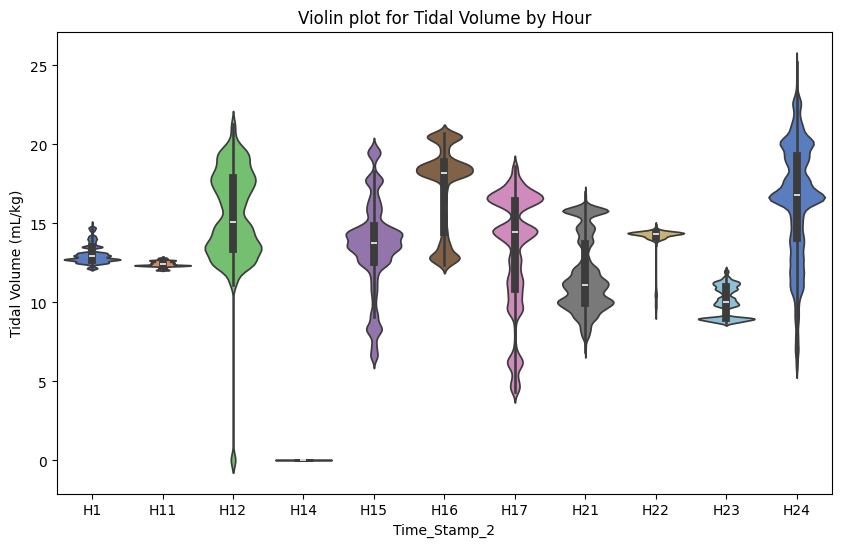

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up the plotting environment
fig, ax = plt.subplots(figsize=(10, 6))

# Create the violin plot with the boxplot included and a specified order
sns.violinplot(ax=ax, 
               x='Time_Stamp_2', 
               y='TV(mL/kg)_ma', 
               data=AVEAA_1st_df, 
               inner='box',    # Include the boxplot inside the violin plot
               hue='Time_Stamp_2', 
               palette='muted',
               legend=False)

# Customize the plot as needed
ax.set_title('Violin plot for Tidal Volume by Hour')
ax.set_xlabel('Time_Stamp_2')
ax.set_ylabel('Tidal Volume (mL/kg)')

custom_labels = AVEAA_1st_df['Time_Stamp_2'].unique()
custom_labels = sorted(custom_labels, key=lambda x: int(x[1:]))

# Set custom x-axis labels (bottom x-axis)
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels)

# Show the plot
plt.show()


In [17]:
import pandas as pd

# Define renaming and column selection mappings
cdgr_columns = {
    'Time': 'Time',
    'CDGR - PIP': 'PIP',
    'CDGR - PEEP': 'PEEP',
    'CDGR - Flow (FTandBBF)': 'Flow',
    'TV(mL/kg)': 'TV(mL/kg)',
    'TV(mL/kg)_ma': 'TV(mL/kg)_ma',
    'Tumbling_window': 'Tumbling_window',
    'OSI': 'OSI',
    'PID': 'PID',
    'Source_File': 'Source_File'
}

aveaa_columns = {
    'Time': 'Time',
    'AVEA - PIP': 'PIP',
    'AVEA - PEEP': 'PEEP',
    'AVEA - Air Flow Wave (FTandBBF)': 'Flow',
    'TV(mL/kg)': 'TV(mL/kg)',
    'TV(mL/kg)_ma': 'TV(mL/kg)_ma',
    'Tumbling_window': 'Tumbling_window',
    'OSI': 'OSI',
    'PID': 'PID',
    'Source_File': 'Source_File'
}

# Select and rename columns for CDGR_1st_df
CDGR_1st_df_selected = CDGR_1st_df.rename(columns=cdgr_columns)[list(cdgr_columns.values())]

# Select and rename columns for AVEAA_1st_df
AVEAA_1st_df_selected = AVEAA_1st_df.rename(columns=aveaa_columns)[list(aveaa_columns.values())]

# Concatenate the selected DataFrames
combined_df = pd.concat([CDGR_1st_df_selected, AVEAA_1st_df_selected], axis=0, ignore_index=True)

# # Optionally, save the combined dataframe to a new CSV file
# combined_csv_path = "/nfs/turbo/med-kayvan-lab/Projects/PARDS/02-Data/02-EVENTS/Cleaned/combined_cdgr_aveaa.csv"
# combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined DataFrame shape: {combined_df.shape}")


Combined DataFrame shape: (16256611, 10)


In [18]:
pards_1st_df = combined_df
pards_1st_df.shape

(16256611, 10)

In [24]:
len(pards_1st_df['Source_File'].unique())

56

In [25]:
len(pards_1st_df['Tumbling_window'].unique())

5

In [22]:
pards_1st_df

,Time,PIP,PEEP,Flow,TV(mL/kg),TV(mL/kg)_ma,Tumbling_window,OSI,PID,Source_File
0,2023-12-10 12:23:14.002000,14.0,4.8,-3.380173,9.269663,9.269663,1,4.150000,1018494.0,a_58_CDGR_39_1st (38).csv
1,2023-12-10 12:23:14.012000,14.0,4.8,-3.289829,9.269663,9.269663,1,4.150000,1018494.0,a_58_CDGR_39_1st (38).csv
2,2023-12-10 12:23:14.022000,14.0,4.8,-3.200128,9.269663,9.269663,1,4.150000,1018494.0,a_58_CDGR_39_1st (38).csv
3,2023-12-10 12:23:14.032000,14.0,4.8,-3.199807,9.269663,9.269663,1,4.150000,1018494.0,a_58_CDGR_39_1st (38).csv
4,2023-12-10 12:23:14.042000,14.0,4.8,-3.110104,9.269663,9.269663,1,4.150000,1018494.0,a_58_CDGR_39_1st (38).csv
...,...,...,...,...,...,...,...,...,...,...
16256606,2023-11-01 14:05:00.053,20.0,10.0,-11.774884,3.934727,15.201182,5,18.085106,132310.0,a_58_AVEAA_4_1st (2).csv
16256607,2023-11-01 14:05:00.063,20.0,10.0,-11.764665,3.934727,15.201630,5,18.085106,132310.0,a_58_AVEAA_4_1st (2).csv
16256608,2023-11-01 14:05:00.073,20.0,10.0,-11.667953,3.934727,15.202079,5,18.085106,132310.0,a_58_AVEAA_4_1st (2).csv
16256609,2023-11-01 14:05:00.083,20.0,10.0,-11.714855,3.934727,15.202527,5,18.085106,132310.0,a_58_AVEAA_4_1st (2).csv


In [20]:
%store pards_1st_df

Stored 'pards_1st_df' (DataFrame)


In [21]:
%store -r flow_dtcwpt
flow_dtcwpt.shape

(207941, 161)